<a href="https://colab.research.google.com/github/FANG87003/2025_DL_hws/blob/main/hw5-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 113-2 深度學習 作業 5-1

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 一、 載入資料集

## 1 . 下載IMDb



In [ ]:
import urllib.request
import os
import tarfile

url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
filepath = "data/aclImdb_v1.tar.gz"


if not os.path.isfile(filepath):
  result = urllib.request.urlretrieve(url, filepath)
  print("Downloaded:", result)

Downloaded: ('data/aclImdb_v1.tar.gz', <http.client.HTTPMessage object at 0x78405c40bf50>)


## 2 . 解壓縮IMDb：在data/aclImdb

In [ ]:
if not os.path.exists("data/aclImdb"):
  with tarfile.open(filepath, 'r:gz') as tfile:
    tfile.extractall('data/')

## 3 . 匯入文字資料預處理模組

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

## 4 . 定義 rm_tags ( text ) 函數
用以去除text當中的HTML標籤(tag)

In [ ]:
import re
def rm_tags(text):
  re_tag = re.compile(r'<[^>]+>')
  return re_tag.sub('', text)

## 5 . 定義 read_files ( filetype ) 函數

In [ ]:
import os
def read_files(filetype):
  path = "data/aclImdb/"
  file_list = []

  positive_path=path + filetype + "/pos/"
  for f in os.listdir(positive_path):
    file_list += [positive_path + f]

  negative_path = path + filetype + "/neg/"
  for f in os.listdir(negative_path):
    file_list += [negative_path + f]

  print('read',filetype, 'files:',len(file_list))

  all_labels = ([1] * 12500 + [0] * 12500)

  all_texts  = []
  for fi in file_list:
    with open(fi, encoding='utf8') as file_input:
      all_texts += [rm_tags(" ".join(file_input.readlines()))]

  return all_labels,all_texts

## 6 . 建立訓練與測試資料

In [ ]:
y_train, train_text = read_files("train")
y_test, test_text = read_files("test")

read train files: 25000
read test files: 25000


## 7 . 利用tokenizer建立字典

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_text)

print(tokenizer.document_count)

25000


## 8 . 轉換每篇影評(文字串)為一連串的數字(數字串)
* 每篇影評所有**單字(word)**轉換為一個一個的數字(index)

In [ ]:
x_train_seq = tokenizer.texts_to_sequences(train_text)
x_test_seq = tokenizer.texts_to_sequences(test_text)

x_train = pad_sequences(x_train_seq, maxlen=100)
x_test = pad_sequences(x_test_seq, maxlen=100)

## 9 . 轉換x_train, x_test, y_train, y_test為numpy array

In [ ]:
import numpy as np

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (25000, 100)
x_test shape: (25000, 100)
y_train shape: (25000,)
y_test shape: (25000,)


# 二、建立神經網路模型

## 1 . 載入套件

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM

## 2 .  讀入數據


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_text)

x_train_seq = tokenizer.texts_to_sequences(train_text)
x_test_seq = tokenizer.texts_to_sequences(test_text)


# 轉換x_train, x_test, y_train, y_test 為 numpy array
x_train = pad_sequences(x_train_seq, maxlen=100)
x_test = pad_sequences(x_test_seq, maxlen=100)

y_train = np.array(y_train)
y_test = np.array(y_test)

## 3 . 建立神經網路模型

In [ ]:
model = Sequential()

### (1) Embedding 層
* 參數 = 10000 × 128 = 1280000
* output shape (64, 100, 128)

In [ ]:
model.add(Embedding(10000, 128)) # 10000 × 128 = 1280000

### (2) LSTM 層
* 4 × 本層神經元數 × ( 前層輸出維度 + 本層神經元數 + 1 )
* 參數 = 4 × 128 ( 128 + 128 + 1 )
* output shape (64, 128)

In [ ]:
model.add(LSTM(128)) # 4 × 128 ( 128 + 128 + 1 )

### (3) Dense 層
* 參數 = 128 × 1 + 1 = 129
* output shape (64, 1)

In [ ]:
model.add(Dense(1, activation='sigmoid')) # 128 × 1 + 1 = 129

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 4 . 訓練神經網路模型
* batch_size= 64，maxlen= 100

* input shape (64, 100)

* output shape：

   Embedding → (64, 100, 128)  
   LSTM(128) → (64, 128)       
   Dense(1) → (64, 1)        

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7316 - loss: 0.5233 - val_accuracy: 0.7978 - val_loss: 0.4515
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9020 - loss: 0.2525 - val_accuracy: 0.8782 - val_loss: 0.3074
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9350 - loss: 0.1817 - val_accuracy: 0.8280 - val_loss: 0.4451
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9577 - loss: 0.1185 - val_accuracy: 0.7876 - val_loss: 0.6235
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9708 - loss: 0.0848 - val_accuracy: 0.7694 - val_loss: 0.7350
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9767 - loss: 0.0727 - val_accuracy: 0.7780 - val_loss: 0.9245
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9819 - loss: 0.0579 - val_accuracy: 0.8312 - val_loss: 0.7199
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9872 - loss: 0.0415 - val_accuracy

## 5 . 顯示 loss & accuracy 折線圖

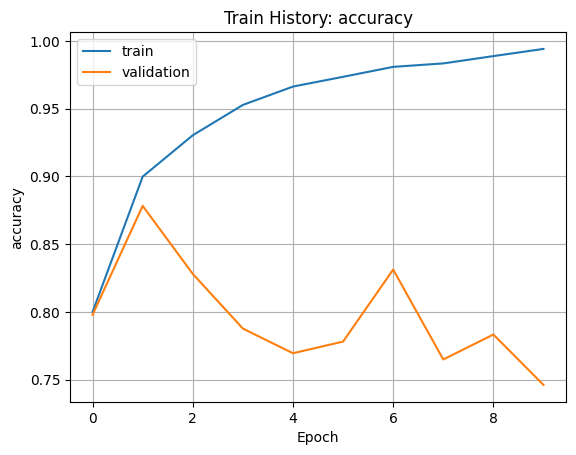

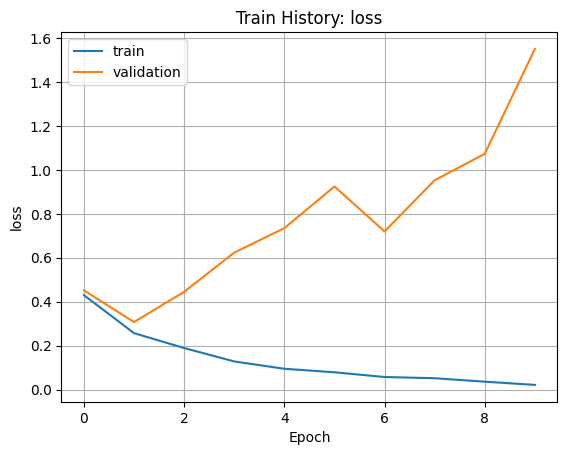

In [ ]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title(f'Train History: {train}')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.grid(True)
    plt.show()

show_train_history(history, 'accuracy', 'val_accuracy')
show_train_history(history, 'loss', 'val_loss')

## 6 . 評估模型準確率

In [ ]:
scores = model.evaluate(x_test, y_test)
print(f"Accuracy: {scores[1] * 100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8669 - loss: 0.7787
Accuracy: 81.28%


# 三、儲存

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


## 1 . 儲存模型與權重

In [ ]:
model_json = model.to_json()
with open('SaveModel/Imdb_LSTM_model.json', 'w') as f:
  f.write(model_json)

model.save_weights('SaveModel/Imdb_LSTM_model.weights.h5')

## 2 . 儲存 tokenizer


In [ ]:
import pickle

with open('SaveModel/imdb_tokenizer_10000.pkl', 'wb') as f:
  pickle.dump(tokenizer, f)